In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
DATA_FILE = '../data/birth_life_2010.txt'

In [3]:
batch_size = 10
n_epoch = 100

In [4]:
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [5]:
# Step 1: read in data from the .txt file
data, n_samples = read_birth_life_data(DATA_FILE)

In [6]:
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

In [7]:
dataset = dataset.shuffle(1000).repeat().batch(10)

In [8]:
X, Y = dataset.make_one_shot_iterator().get_next()

In [9]:
# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [10]:
# Step 4: build model to predict Y
hypothesis = w * X + b 

In [11]:
# Step 5: use the squared error as the loss function
# you can use either mean squared error or Huber loss
loss = tf.reduce_mean(tf.square(Y - hypothesis), name='loss')

In [16]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [17]:
writer = tf.summary.FileWriter('./graphs/linear_reg_dataset_1', tf.get_default_graph())
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    
    total_batch = int(n_samples/batch_size)
    
    # Step 8: train the model for 100 epochs
    for i in range(n_epoch): 
        total_loss = 0
        for i in range(total_batch):
            # Session execute optimizer and fetch values of loss
            #_, l = sess.run([optimizer, loss], feed_dict={X: x_data, Y:y_data}) 
            _, l = sess.run([optimizer, loss]) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/total_batch))

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b]) 

Epoch 18: 1777.4015599300988
Epoch 18: 1118.1898482473273
Epoch 18: 969.4795949835526
Epoch 18: 834.2611662212171
Epoch 18: 735.8605828536184
Epoch 18: 642.1222084446957
Epoch 18: 562.4701184724506
Epoch 18: 492.84142584549755
Epoch 18: 437.7646484375
Epoch 18: 375.2195530941612
Epoch 18: 328.438601042095
Epoch 18: 287.6571149324116
Epoch 18: 258.1275903802169
Epoch 18: 225.31575253135279
Epoch 18: 200.2528216713353
Epoch 18: 177.09646285207648
Epoch 18: 155.72651471589742
Epoch 18: 142.5835454840409
Epoch 18: 124.7789939077277
Epoch 18: 114.31130298815276
Epoch 18: 104.66172910991467
Epoch 18: 92.94560382240697
Epoch 18: 85.1118194178531
Epoch 18: 77.62856373034026
Epoch 18: 70.90003766511616
Epoch 18: 66.91420434650622
Epoch 18: 60.68930856805099
Epoch 18: 57.008415724101816
Epoch 18: 53.55832862854004
Epoch 18: 51.48582448457417
Epoch 18: 48.281628257349915
Epoch 18: 45.57981902674625
Epoch 18: 43.59733742161801
Epoch 18: 41.354419356898255
Epoch 18: 41.13707893773129
Epoch 18: 38.6

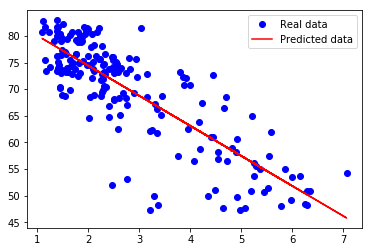

In [18]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()